In [21]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
sp.init_printing()

Define symbolic variables

In [22]:
m, m1, m2, k1, k2, c, c1, c2 = sp.symbols('m m1 m2 k1 k2 c c1 c2', positive=True)
ca, omega = sp.symbols('c_a omega')
t = sp.symbols('t')

Define the generalized coordinates

In [23]:
q1, q2 = sp.symbols('q1 q2', cls=sp.Function)

In [24]:
type = 3

Define the mass, damping, and stiffness matrices

In [25]:
if type == 1:
    M = sp.Matrix([[m1, 0], [0, m2]])
    C = sp.Matrix([[c1, 0], [0, c2]])
    K = sp.Matrix([[k1, 0], [0, k2]])
elif type == 2:
    M = sp.Matrix([[m, 0], [0, 0]])
    C = sp.Matrix([[c-ca, -c], [-c, c]])
    K = sp.Matrix([[0, 0], [0, k2]])
elif type == 3:
    M = sp.Matrix([[m, 0], [0, 0]])
    C = sp.Matrix([[-ca, 0], [0, c]])
    K = sp.Matrix([[k1+k2, -k2], [-k2, k2]])
elif type == 4:
    M = sp.Matrix([[m, 0], [0, 0]])
    C = sp.Matrix([[-ca, 0], [0, c]])
    K = sp.Matrix([[k1, -k1], [-k1, k1+k2]])
else:
    M = sp.Matrix([[m1, 0], [0, m2]])
    C = sp.Matrix([[c1-ca, -c1], [-c1, c1+c2]])
    K = sp.Matrix([[k1, -k1], [-k1, k1+k2]])
    

Take some values

In [26]:
mr   = 5.0
dens = 1.0
D    = 1.0
mu   = 0.01
Re   = 200.0
UR   = 40.0
ma   = 3.5
ma   = 0.0

F0   = 0.1
ws   = 0.94

xi = 0.1
R  = 1

U = Re*mu/dens/D
w = 2.0*np.pi*U/UR/D

m_val = mr*dens*D*D
k_val = w**2*m_val
c_val = 2.0*m_val*w*xi;
c_val

In [27]:
dict_val = {m:m_val, c:c_val, k1:k_val, k2:k_val*R}

Define the characteristic equation

In [28]:
characteristic_eq = sp.det(K + omega * C + omega**2 * M)
characteristic_eq.subs(dict_val)

Solve for the natural frequencies (angular frequencies)

In [29]:
natural_frequencies = sp.solve(characteristic_eq.subs(dict_val), omega, simplify=False)

Display the natural frequencies

In [30]:
print("Natural Frequencies:")
#sp.pprint(natural_frequencies)

Natural Frequencies:


In [31]:
#display(natural_frequencies)

In [32]:
#print(sp.latex(natural_frequencies[0]))

In [33]:
#print(sp.latex(natural_frequencies[1]))

In [34]:
#print(sp.latex(natural_frequencies[2]))

In [35]:
f0 = sp.lambdify(ca, natural_frequencies[0])
f1 = sp.lambdify(ca, natural_frequencies[1])
f2 = sp.lambdify(ca, natural_frequencies[2])

In [36]:
ca_pos = np.linspace(0.0,4.0,num=5000, dtype=complex)
ca_neg = np.linspace(-15.0, 0.0, endpoint=False, num=5000, dtype=complex)

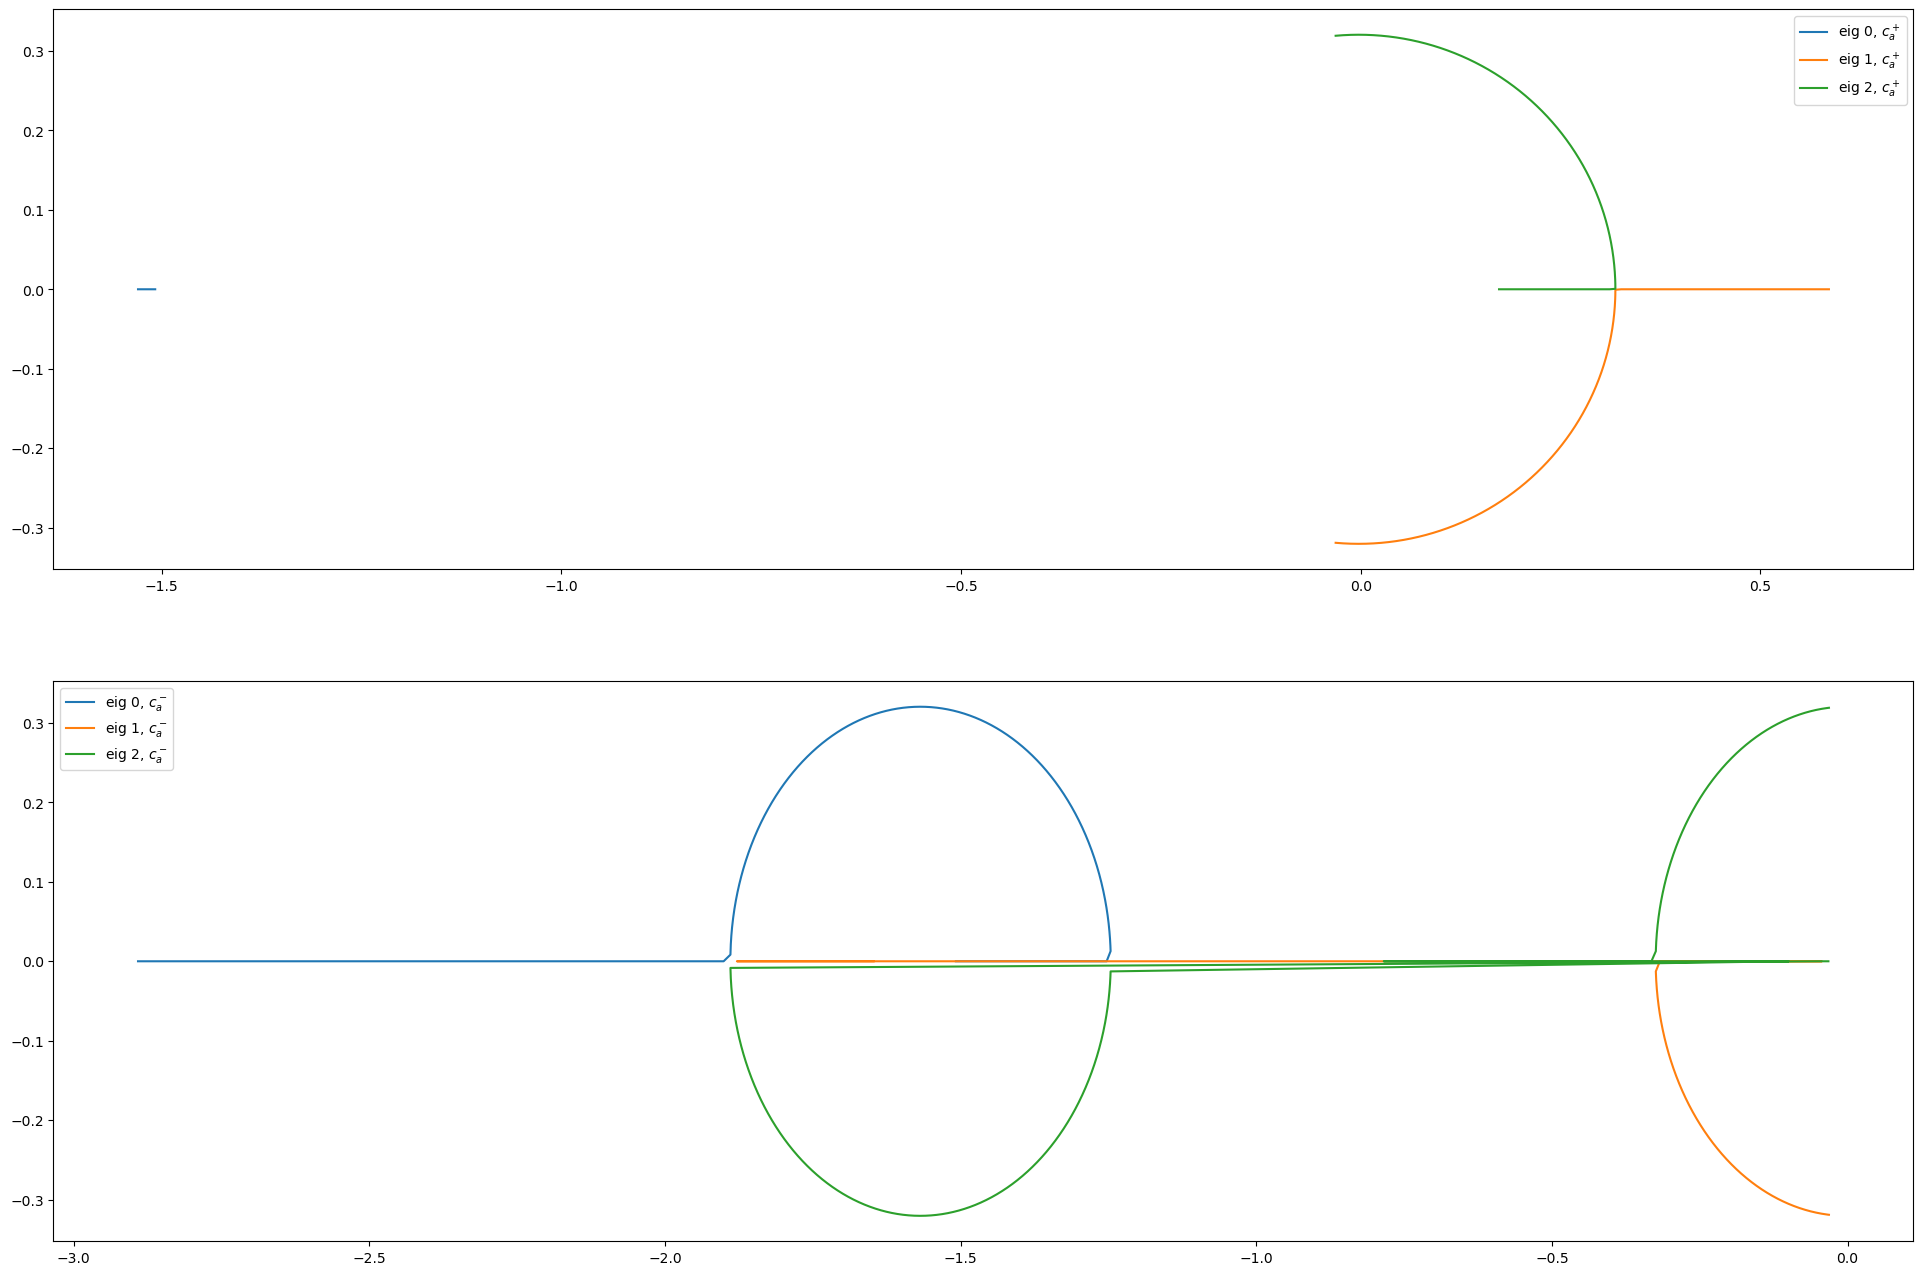

In [37]:
plt.figure(figsize=(24,16))
plt.subplot(2,1,1)
plt.plot(np.real(f0(ca_pos)),np.imag(f0(ca_pos)),'-', ms=12, label=r'eig 0, $c_a^+$')
plt.plot(np.real(f1(ca_pos)),np.imag(f1(ca_pos)),'-', label=r'eig 1, $c_a^+$')
plt.plot(np.real(f2(ca_pos)),np.imag(f2(ca_pos)),'-', label=r'eig 2, $c_a^+$')
plt.legend()

plt.subplot(2,1,2)
plt.plot(np.real(f0(ca_neg)),np.imag(f0(ca_neg)),'-', ms=12, label=r'eig 0, $c_a^-$')
plt.plot(np.real(f1(ca_neg)),np.imag(f1(ca_neg)),'-', label=r'eig 1, $c_a^-$')
plt.plot(np.real(f2(ca_neg)),np.imag(f2(ca_neg)),'-', label=r'eig 2, $c_a^-$')
plt.legend()

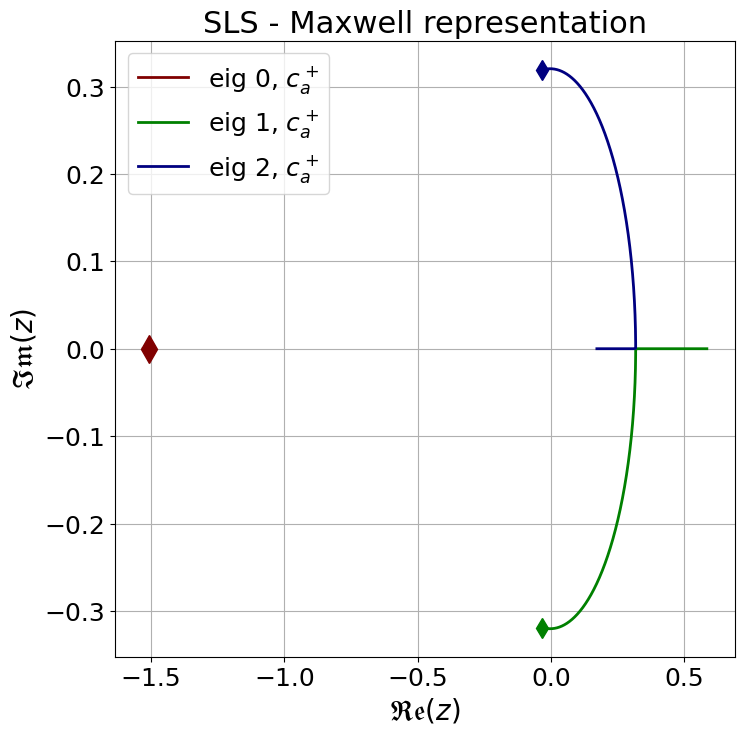

In [38]:
plt.figure(figsize=(8,8))
plt.plot(np.real(f0(ca_pos)),np.imag(f0(ca_pos)),'-', color=[0.5, 0, 0], lw=2, label=r'eig 0, $c_a^+$')
plt.plot(np.real(f1(ca_pos)),np.imag(f1(ca_pos)),'-', color=[0, 0.5, 0], lw=2, label=r'eig 1, $c_a^+$')
plt.plot(np.real(f2(ca_pos)),np.imag(f2(ca_pos)),'-', color=[0, 0, 0.5], lw=2, label=r'eig 2, $c_a^+$')

plt.plot(np.real(f0(ca_pos[0])),np.imag(f0(ca_pos[0])),'d', color=[0.5, 0, 0], ms=14)
plt.plot(np.real(f1(ca_pos[0])),np.imag(f1(ca_pos[0])),'d', color=[0, 0.5, 0], ms=10)
plt.plot(np.real(f2(ca_pos[0])),np.imag(f2(ca_pos[0])), 'd', color=[0, 0, 0.5], ms=10)

plt.xlabel(r'$\mathfrak{Re}(z)$', fontsize=20)
plt.ylabel(r'$\mathfrak{Im}(z)$', fontsize=20)
plt.legend(fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.grid();

if type==2:
    plt.title('Maxwell model', fontsize=22)
    plt.savefig('Maxwell.png', bbox_inches='tight');
elif type ==3:
    plt.title('SLS - Maxwell representation', fontsize=22)
    plt.savefig('SLS_Maxwell.png', bbox_inches='tight');
elif type==4:
    plt.title('SLS - Voigt representation', fontsize=22)
    plt.savefig('SLS_Voigt.png', bbox_inches='tight');


